In [21]:
import pandas as pd
from astropy.coordinates import SkyCoord
from astropy import units as u
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
names=["objid", "ra", "dec", "photoz", "photoz_err", "spz", "gmr","gmr_err","rmi","rmi_err","dered_u","dered_g","dered_r",\
       "dered_i","dered_z","u_Err","g_Err","r_Err","i_Err","z_Err","S_Cluster","GM_Scaled_Ngals","GM_Ngals_Weighted",\
       "weightOK","name"]
df_gmbcg=pd.read_csv('GMBCG_SDSS_DR7_PUB_ASCII.txt',skiprows=7,names=names)

In [8]:
df_sdss=pd.read_csv('/Users/taweewat/Documents/xray_project/ned-result/final_sdss_cut5.csv',index_col=0)

In [38]:
df_gmbcg.head()

,objid,ra,dec,photoz,photoz_err,spz,gmr,gmr_err,rmi,rmi_err,...,u_Err,g_Err,r_Err,i_Err,z_Err,S_Cluster,GM_Scaled_Ngals,GM_Ngals_Weighted,weightOK,name
0,588848900431806785,139.48462,0.290392,0.435,0.014,0.44524,1.821,0.091,0.752,0.032,...,1.370,0.086,0.027,0.018,0.055,13.149,34,0.0,0,GMBCG J139.48462+00.29039
1,587725073918132728,138.72786,-0.743814,0.445,0.080,0.00000,1.316,0.097,0.702,0.054,...,0.333,0.085,0.046,0.028,0.074,15.382,49,0.0,0,GMBCG J138.72786-00.74381
2,587725074450023190,127.47054,-0.236442,0.443,0.018,0.00000,1.763,0.073,0.775,0.030,...,0.383,0.068,0.026,0.015,0.044,14.388,20,0.0,0,GMBCG J127.47054-00.23644
3,587725074992005814,139.09781,0.103403,0.464,0.034,0.00000,1.782,0.155,0.784,0.059,...,1.030,0.146,0.050,0.032,0.074,13.479,13,0.0,0,GMBCG J139.09781+00.10340
4,587722982296584608,224.80738,-0.690585,0.440,0.016,0.00000,1.779,0.088,0.774,0.034,...,1.028,0.084,0.027,0.021,0.043,16.984,30,0.0,0,GMBCG J224.80738-00.69059


In [13]:
c=SkyCoord(ra=df_sdss.ra*u.degree, dec=df_sdss.dec*u.degree)
catalog=SkyCoord(ra=df_gmbcg.ra*u.degree, dec=df_gmbcg.dec*u.degree)

In [14]:
idx, d2d, d3d = c.match_to_catalog_sky(catalog) 

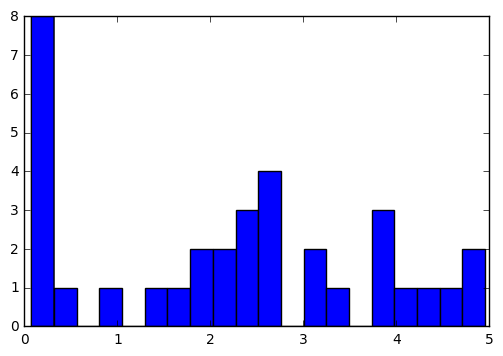

In [33]:
plt.hist(d2d.to(u.arcmin)[d2d.to(u.arcmin)<5*u.arcmin],bins=20);

In [63]:
df_sdss['GMBCG']=df_gmbcg.loc[idx]['name'].values
df_sdss['GMBCG_dist']=d2d.to(u.arcmin).value
df_sdss['GMBCG_str']=df_gmbcg.loc[idx]['S_Cluster'].values

In [76]:
df_sdss[(df_sdss['GMBCG_dist']<5.) & (df_sdss['GMBCG_str']>=10.)].name

69     SDSS069
123    SDSS123
127    SDSS127
137    SDSS137
469    SDSS469
478    SDSS478
486    SDSS486
501    SDSS501
506    SDSS506
507    SDSS507
530    SDSS530
603    SDSS603
612    SDSS612
634    SDSS634
649    SDSS649
747    SDSS747
Name: name, dtype: object